# Wine Classification 

### Wine recognition dataset from UC Irvine.

Labels: "name" - Number denoting a specific wine class

- Number of instances of each wine class

* Class 1 - 59
* Class 2 - 71
* Class 3 - 48

Features:

* Alcohol
* Malic acid
* Ash
* Alcalinity of ash
* Magnesium
* Total phenols
* Flavanoids
* Nonflavanoid phenols
* Proanthocyanins
* Color intensity
* Hue
* OD280/OD315 of diluted wines
* Proline

Content

"This data set is the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines"

In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from subprocess import check_output
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


In [39]:
# Load data

data=pd.read_csv('Wine.csv')
data.head(2)


,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [40]:
# Add Headers

data.columns = [  'name'
                 ,'alcohol'
                 ,'malicAcid'
                 ,'ash'
                 ,'ashalcalinity'
                 ,'magnesium'
                 ,'totalPhenols'
                 ,'flavanoids'
                 ,'nonFlavanoidPhenols'
                 ,'proanthocyanins'
                 ,'colorIntensity'
                 ,'hue'
                 ,'od280_od315'
                 ,'proline'
                ]

data.head(2)

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [41]:
#Prepare data for model 

y = data['name'].values
X = data.drop(['name'], axis=1)
X.head(1)

,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050


In [42]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

print(X_train.shape)
print(X_test.shape)

(118, 13)
(59, 13)


### Hyper parameter Tuning

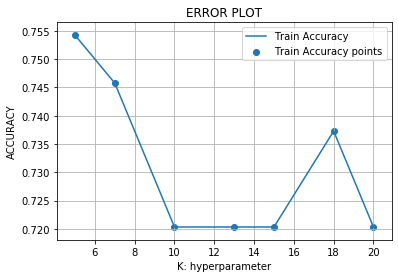

In [43]:
train_acc = []
K = [5, 7, 10, 13, 15, 18, 20]

for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(X_train, y_train)
    
    # Predict using KNN 
    y_train_pred = neigh.predict(X_train)    

    train_acc.append(accuracy_score(y_train,y_train_pred))
    
plt.plot(K, train_acc, label='Train Accuracy')
plt.scatter(K, train_acc, label='Train Accuracy points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("ACCURACY")
plt.title("ERROR PLOT")
plt.grid()
plt.show()


### Perform final predict on best_K

In [46]:
best_k = 3

In [47]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

#Perform prediction on test data

y_test_pred = neigh.predict(X_test) 

print("Accuracy on Test data {} - ".format(accuracy_score(y_test,y_test_pred)))


Accuracy on Test data 0.7288135593220338 - 
